In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
keras.__version__

'2.2.4-tf'

In [4]:
tf.__version__

'2.0.0-rc1'

In [5]:
fashion = keras.datasets.fashion_mnist

In [6]:
(x_train, y_train), (x_test, y_test) = fashion.load_data()

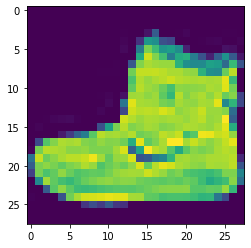

In [7]:
plt.imshow(x_train[0])

In [8]:
class_names = ['Tshirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

In [9]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

<h1>Normalization of Data

In [10]:
x_train = x_train/255.0
x_test = x_test/255.0

In [11]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

<h3>Further splitting training dataset into training and validation dataset

In [12]:
x_valid, x_train = x_train[:5000], x_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]


In [13]:
x_valid

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [14]:
np.random.seed(2)
tf.random.set_seed(2)

<h2>making a sequential model

In [15]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


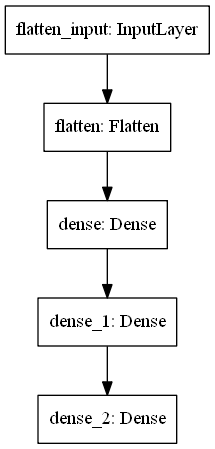

In [18]:
import pydot
import os
os.environ["PATH"] += os.pathsep + r'C:\User\Python\Library\bin\graphviz'
keras.utils.plot_model(model)

In [19]:
weights, biases = model.layers[1].get_weights()

In [20]:
weights

array([[-0.05253947, -0.00531845, -0.04093379, ...,  0.05741175,
         0.02355441, -0.01513899],
       [ 0.02064482, -0.03910443,  0.04255031, ...,  0.0565165 ,
         0.02028506,  0.02037737],
       [-0.01368756, -0.02092682,  0.04859374, ...,  0.07405861,
         0.02916937,  0.01523611],
       ...,
       [-0.02056999, -0.02840946,  0.01228774, ..., -0.04157492,
         0.01497117, -0.03625602],
       [-0.0473625 , -0.02193431,  0.05264042, ...,  0.06302747,
        -0.01927977, -0.04483707],
       [ 0.04552844,  0.04127248,  0.06035224, ...,  0.00508523,
         0.01547606,  0.03695052]], dtype=float32)

In [22]:
weights.shape

(784, 300)

In [23]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [24]:
biases.shape

(300,)

In [26]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics = ["accuracy"])

In [27]:
model_history = model.fit(x_train, y_train, epochs=30, validation_data=(x_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 15s 273us/sample - loss: 0.7298 - accuracy: 0.7553 - val_loss: 0.5016 - val_accuracy: 0.8298
Epoch 2/30
55000/55000 [==============================] - 13s 242us/sample - loss: 0.4934 - accuracy: 0.8277 - val_loss: 0.4580 - val_accuracy: 0.8406
Epoch 3/30
55000/55000 [==============================] - 15s 266us/sample - loss: 0.4496 - accuracy: 0.8424 - val_loss: 0.4355 - val_accuracy: 0.8466
Epoch 4/30
55000/55000 [==============================] - 14s 263us/sample - loss: 0.4208 - accuracy: 0.8525 - val_loss: 0.4279 - val_accuracy: 0.8576
Epoch 5/30
55000/55000 [==============================] - 14s 263us/sample - loss: 0.4006 - accuracy: 0.8585 - val_loss: 0.3894 - val_accuracy: 0.8662
Epoch 6/30
55000/55000 [==============================] - 14s 263us/sample - loss: 0.3833 - accuracy: 0.8636 - val_loss: 0.3797 - val_accuracy: 0.8702
Epoch 7/30
55000/55000 [=====================

In [29]:
model_history.history

{'loss': [0.7298214991959658,
  0.49338707172220403,
  0.44961439052928576,
  0.420826207520745,
  0.40063403615951537,
  0.38332868631969796,
  0.37003689472241835,
  0.357453842644258,
  0.347498425804485,
  0.33764267690398475,
  0.32772108687054025,
  0.3204501374656504,
  0.3127176462173462,
  0.30616224181435325,
  0.3003201271533966,
  0.2933615554527803,
  0.2869880843292583,
  0.2812920547767119,
  0.27663513014750046,
  0.27236846017837524,
  0.2664789971026507,
  0.2620354871294715,
  0.2583198567867279,
  0.2529939936345274,
  0.2486499722318216,
  0.24454374348033558,
  0.2406899072560397,
  0.23675050428780642,
  0.23297661649422213,
  0.2291367820934816],
 'accuracy': [0.75525457,
  0.8276909,
  0.8424364,
  0.85254544,
  0.85850906,
  0.8636364,
  0.8691818,
  0.8729636,
  0.87554544,
  0.87807274,
  0.88216364,
  0.8863818,
  0.88781816,
  0.8897273,
  0.89181817,
  0.89361817,
  0.8962182,
  0.89812726,
  0.90076363,
  0.9014182,
  0.9042,
  0.90507275,
  0.9056909,
 

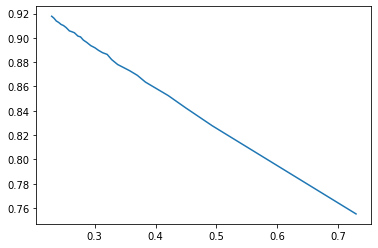

In [45]:
plt.plot(model_history.history['loss'], model_history.history['accuracy'])

In [47]:
model.evaluate(x_test,y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.3084218229055405, 0.8904]

In [48]:
y_pred= model.predict(x_test)

In [51]:
y_pred[0]   #probability

array([1.0603135e-05, 2.5492420e-07, 1.9117977e-05, 1.0716679e-05,
       1.5155221e-06, 1.2517771e-02, 5.8952164e-06, 1.9010341e-02,
       9.5334754e-04, 9.6747041e-01], dtype=float32)

In [58]:
np.array(class_names)[model.predict_classes(x_test)]

array(['Ankle Boot', 'Pullover', 'Trouser', ..., 'Bag', 'Trouser',
       'Sandal'], dtype='<U10')

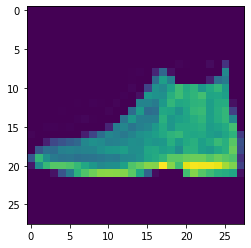

In [63]:
plt.imshow(x_test[0])